In [1]:
import pandas as pd
import numpy as np
from env import get_connection
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data
import os
from scipy import stats

#turn off the pink warning boxes
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import acquire
import prepare

from env import get_connection
pd.options.display.max_columns = None

In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

print the first 3 rows


In [2]:
df = data('iris')
df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


print the number of rows and columns (shape)


In [3]:
df.shape

(150, 5)

print the column names


In [4]:
df.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

print the data type of each column


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


print the summary statistics for each of the numeric variables


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


Read the data from this google sheet into a dataframe, df_google.

print the first 3 rows


In [7]:
df = pd.read_csv('titanic.csv')
df.head(3)

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1


print the number of rows and columns


In [8]:
df.shape

(891, 14)

print the column names


In [9]:
df.columns

Index(['Unnamed: 0', 'passenger_id', 'survived', 'pclass', 'sex', 'age',
       'sibsp', 'parch', 'fare', 'embarked', 'class', 'deck', 'embark_town',
       'alone'],
      dtype='object')

print the data type of each column


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    891 non-null    int64  
 1   passenger_id  891 non-null    int64  
 2   survived      891 non-null    int64  
 3   pclass        891 non-null    int64  
 4   sex           891 non-null    object 
 5   age           714 non-null    float64
 6   sibsp         891 non-null    int64  
 7   parch         891 non-null    int64  
 8   fare          891 non-null    float64
 9   embarked      889 non-null    object 
 10  class         891 non-null    object 
 11  deck          203 non-null    object 
 12  embark_town   889 non-null    object 
 13  alone         891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


print the summary statistics for each of the numeric variables


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,891.0,445.000000,257.353842,0.00,222.5000,445.0000,667.5,890.0000
passenger_id,891.0,445.000000,257.353842,0.00,222.5000,445.0000,667.5,890.0000
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
alone,891.0,0.602694,0.489615,0.00,0.0000,1.0000,1.0,1.0000


print the unique values for each of your categorical variables


In [12]:
df.nunique()

Unnamed: 0      891
passenger_id    891
survived          2
pclass            3
sex               2
age              88
sibsp             7
parch             7
fare            248
embarked          3
class             3
deck              7
embark_town       3
alone             2
dtype: int64

In [13]:
for col in df.columns:
    if df[col].dtypes == 'object':
        print(f'{col} has {df[col].nunique()} unique values.')

sex has 2 unique values.
embarked has 3 unique values.
class has 3 unique values.
deck has 7 unique values.
embark_town has 3 unique values.


Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

assign the first 100 rows to a new dataframe, df_excel_sample


In [14]:
df = pd.read_excel('titanic.xlsx')
df_excel_sample = df.head(100)
df_excel_sample.head()

FileNotFoundError: [Errno 2] No such file or directory: 'titanic.xlsx'

print the number of rows of your original dataframe


In [ ]:
df.shape[0]

print the first 5 column names


In [ ]:
df.columns[0:5]

print the column names that have a data type of object


In [ ]:
df_objects = df.columns.groupby(df.dtypes)
df_objects

compute the range for each of the numeric variables.


In [ ]:
df.describe()

# Data Preparation Exercises

Using the Iris Data:

Use the function defined in acquire.py to load the iris data.

Drop the species_id and measurement_id columns.



In [ ]:
iris = get_iris_data(get_connection)

In [ ]:
iris.head()

In [ ]:
to_drop = ['species_id', 'measurement_id']

In [ ]:
iris.drop(columns=to_drop, inplace=True)

In [ ]:
iris.drop(columns='Unnamed: 0', inplace=True)

Rename the species_name column to just species.



In [ ]:
iris = iris.rename(columns={'species_name':'name'})

In [ ]:
iris.head()

Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).



In [ ]:
species_name = pd.get_dummies(iris[['name']])

In [ ]:
iris = pd.concat([iris, species_name], axis=1)

Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.



In [ ]:
def prep_iris(df):
    to_drop = ['species_id', 'measurement_id', 'Unnamed: 0']
    df.drop(columns=to_drop, inplace=True)   
    df = df.rename(columns={'species_name':'name'})
    
    dummies = pd.get_dummies(df[['name']], drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    
    return df

In [ ]:
test_iris = get_iris_data(get_connection)

In [ ]:
iris2 = prep_iris(test_iris)

In [ ]:
iris2.head()

Using the Titanic dataset

Use the function defined in acquire.py to load the Titanic data.

Drop any unnecessary, unhelpful, or duplicated columns.

In [ ]:
titanic = acquire.get_titanic_data()
titanic.head()

In [ ]:
titanic = get_titanic_data(get_connection)

In [ ]:
titanic.head()

In [ ]:
to_drop = ['Unnamed: 0', 'class', 'embarked', 'passenger_id', 'deck']
titanic.drop(columns=to_drop, inplace=True)

In [ ]:
titanic.head()

In [ ]:
titanic['embark_town'].isna().sum()

Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.



In [ ]:
titanic.info()

In [ ]:
dummies = pd.get_dummies(df[['sex', 'embark_town']], drop_first=True)

titanic = pd.concat([titanic, dummies], axis=1)

In [ ]:
titanic.head()

Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.



In [ ]:
def prep_titanic(df):
    to_drop = ['Unnamed: 0', 'class', 'embarked', 'passenger_id', 'deck']
    df.drop(columns=to_drop, inplace=True)
    
    dummies = pd.get_dummies(df[['sex', 'embark_town']], drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    
    return df

In [ ]:
test_titanic = get_titanic_data(get_connection)

In [ ]:
test_titanic.head()

In [ ]:
test_titanic = prep_titanic(test_titanic)

Using the Telco dataset

Use the function defined in acquire.py to load the Telco data.

Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.



In [ ]:
telco = acquire.get_telco_data(get_connection)

In [ ]:
telco.head()

In [ ]:
to_drop = ['Unnamed: 0', 'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id', ]

telco.drop(columns=to_drop, inplace=True)
telco.head()

Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.



In [ ]:
telco.info()

In [ ]:
float('' + '0')

In [ ]:
telco['total_charges'] = (telco.total_charges + '0').astype(float)

In [ ]:
categorical_columns = []
bin_cats = []
mult_cats = []
numerical_columns = []
for col in telco.columns:
    if telco[col].dtype == 'object':
        categorical_columns.append(col)
        if telco[col].value_counts().size > 2:
            mult_cats.append(col)
        else:
            bin_cats.append(col)
    else: 
        numerical_columns.append(col)

In [ ]:
categorical_columns

In [ ]:
numerical_columns

In [ ]:
bin_cats

In [ ]:
mult_cats

In [ ]:
to_dummy = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 
            'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 
            'paperless_billing', 'total_charges', 'churn', 'contract_type', 'internet_service_type', 'payment_type']

In [ ]:
dummies = pd.get_dummies(to_dummy, drop_first=True)

dummies

In [ ]:
telco = pd.concat([telco, dummies], axis=1)

In [ ]:
telco.head()

In [ ]:
telco.shape

Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.



In [ ]:
def prep_telco(df):
    to_drop = ['Unnamed: 0', 'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id', ]
    df.drop(columns=to_drop, inplace=True)
    
    to_dummy = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 
                'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 
                'paperless_billing', 'total_charges', 'churn', 'contract_type', 'internet_service_type', 
                'payment_type']
    
    dummies = pd.get_dummies(to_dummy, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    return df
    

In [ ]:
telco_test = get_telco_data(get_connection)

In [ ]:
telco_test = prep_telco(telco_test)

In [ ]:
telco_test.head()

Split your data

Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.



In [ ]:
def split_train_test(df, col):
    
    seed = 69
    train, val_test = train_test_split(df, train_size=.7, random_state=seed, stratify=df[col])
    validate, test = train_test_split(val_test, train_size=.5, random_state=seed, stratify=val_test[col])
    
    return train, validate, test

Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.



In [ ]:
train, validate, test = split_train_test(iris2, 'name')

In [ ]:
train.shape, validate.shape, test.shape

Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.



In [ ]:
test_titanic.head()

In [ ]:
train, validate, test = split_train_test(test_titanic, 'survived')

In [ ]:
train.shape, validate.shape, test.shape

Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.



In [ ]:
telco = get_telco_data(get_connection)

In [ ]:
telco_test.head()

In [ ]:
train, validate, test = split_train_test(telco_test, 'churn')

In [ ]:
train.shape, validate.shape, test.shape

# Exploratory Analysis Exercises

Using iris data from our mySQL server and the methods used in the lesson above:

Acquire, prepare & split your data.

In [72]:
iris = acquire.get_iris_data()

In [50]:
iris = prepare.prep_iris(iris)

In [51]:
train, validate, test = prepare.split_train_test(iris, 'name')

In [52]:
train.shape, validate.shape, test.shape

((75, 7), (45, 7), (30, 7))

In [73]:
train.info()
train.head()
iris.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 41 to 83
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             75 non-null     object 
 1   sepal_length     75 non-null     float64
 2   sepal_width      75 non-null     float64
 3   petal_length     75 non-null     float64
 4   petal_width      75 non-null     float64
 5   name_versicolor  75 non-null     uint8  
 6   name_virginica   75 non-null     uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 3.7+ KB


,Unnamed: 0,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,1,setosa,2,4.9,3.0,1.4,0.2
2,2,1,setosa,3,4.7,3.2,1.3,0.2
3,3,1,setosa,4,4.6,3.1,1.5,0.2
4,4,1,setosa,5,5.0,3.6,1.4,0.2


Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

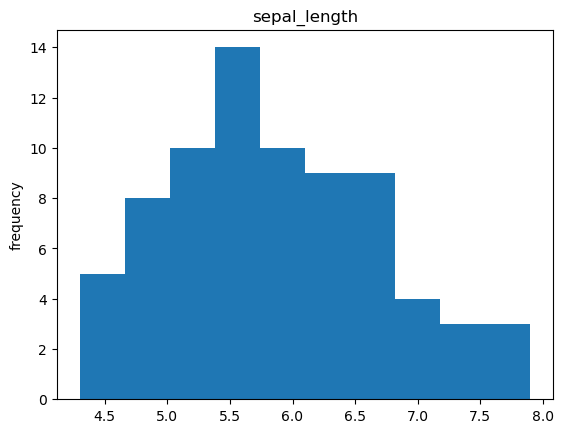

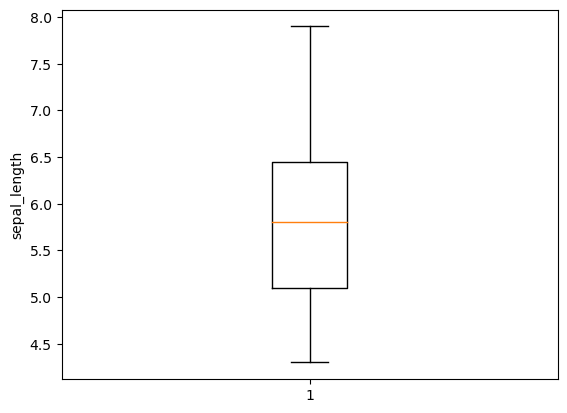

count    75.000000
mean      5.848000
std       0.844595
min       4.300000
25%       5.100000
50%       5.800000
75%       6.450000
max       7.900000
Name: sepal_length, dtype: float64

In [95]:
#identify the columns that are numeric
#filter the dataframe by those column names

num_cols = train.columns[[train[col].dtype == 'float64' for col in train.columns]] 
num_cols

#loop through each numeric column and plot a histogram and barplot
#and compute descriptive stats

#but before doing that, make it work for one variable
col = 'sepal_length'
#histogram
plt.hist(train[col])
plt.title(col)
plt.ylabel('frequency')
plt.show()
#boxplot
plt.boxplot(train[col])
plt.ylabel(col)
plt.show()
#compute descriptive statistics
train[col].describe()

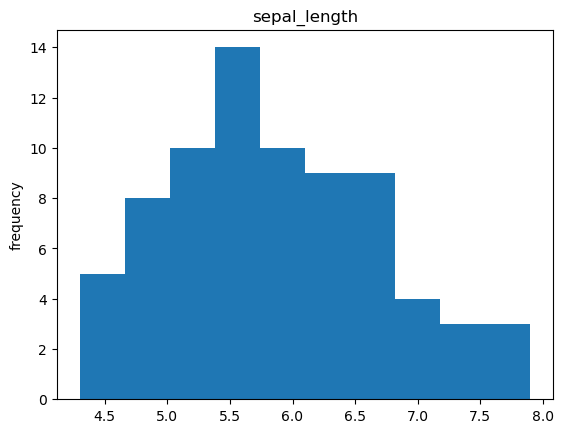

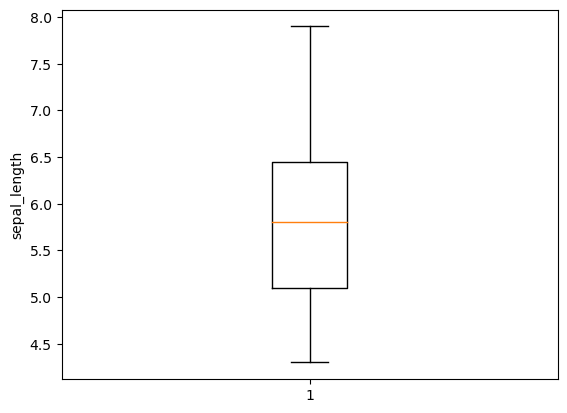

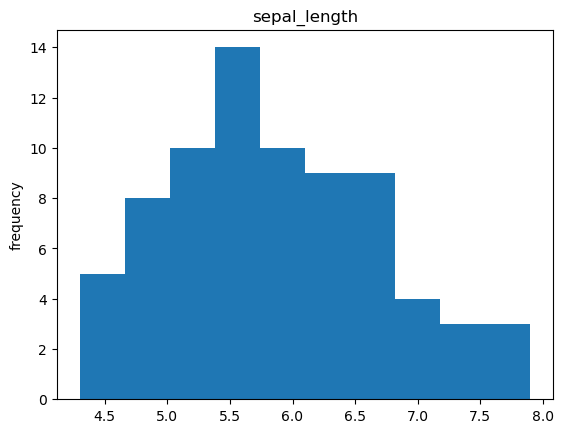

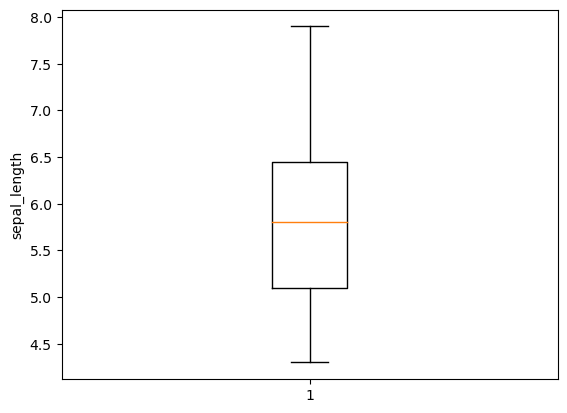

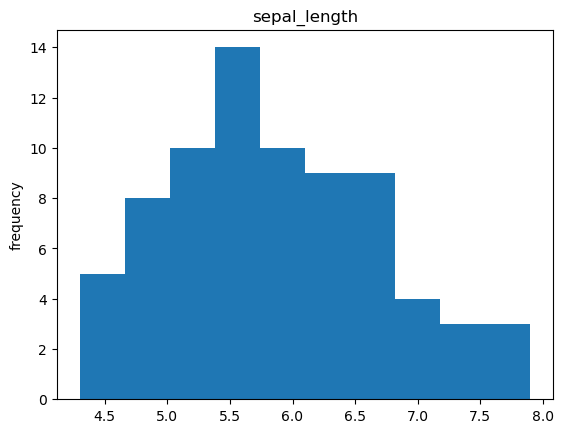

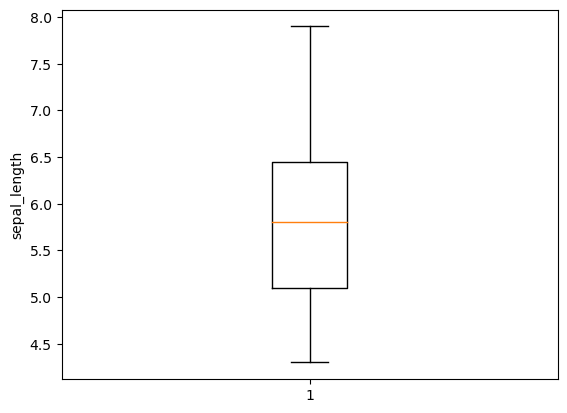

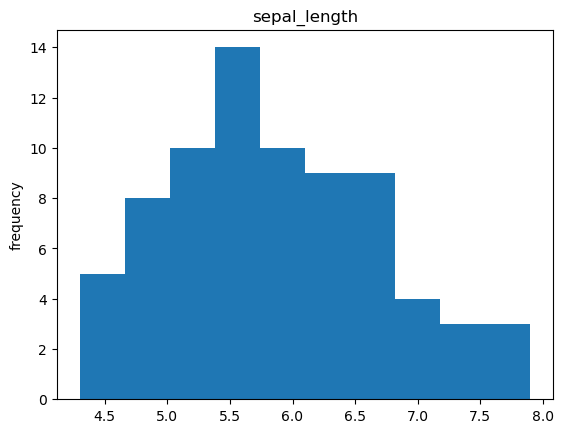

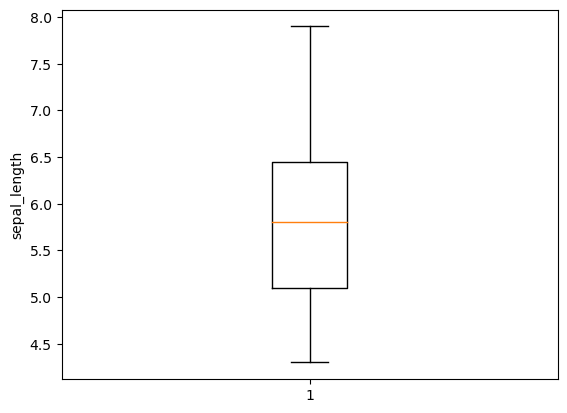

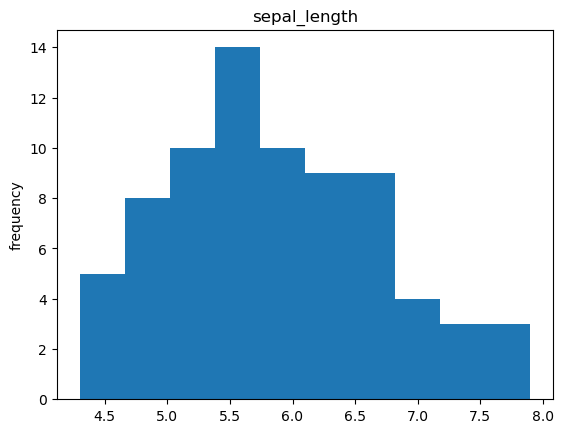

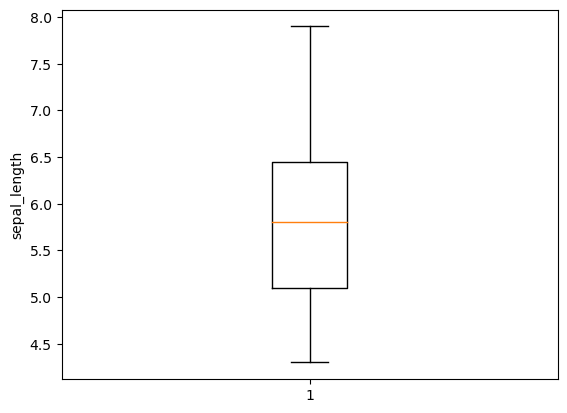

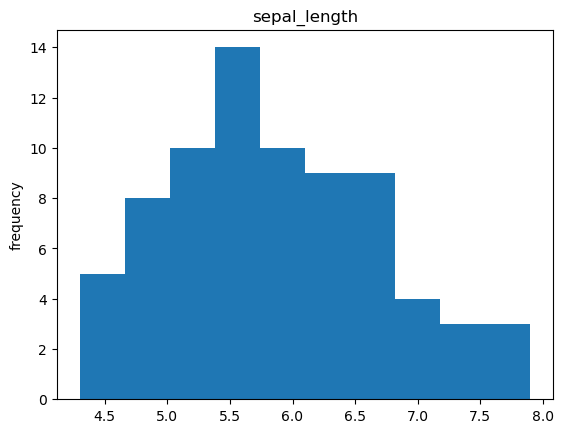

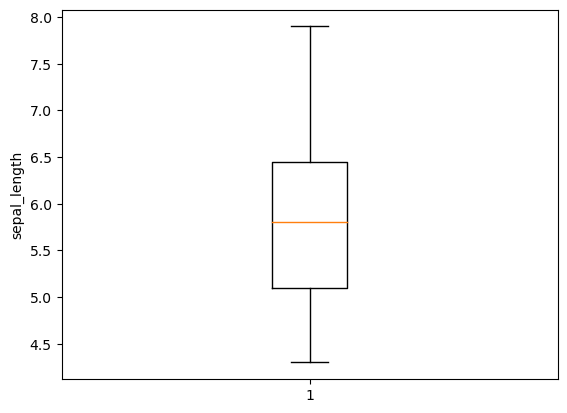

In [76]:
for col in num_cols:
    
    col = 'sepal_length'
    
    #histogram
    plt.hist(train[col])
    plt.title(col)
    plt.ylabel('frequency')
    plt.show()
    
    #boxplot
    plt.boxplot(train[col])
    plt.ylabel(col)
    plt.show()
    
    #compute descriptive statistics
    train[col].describe()

(array([ 1.,  2.,  7.,  8., 14., 17., 12.,  4.,  3.,  7.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <BarContainer object of 10 artists>)

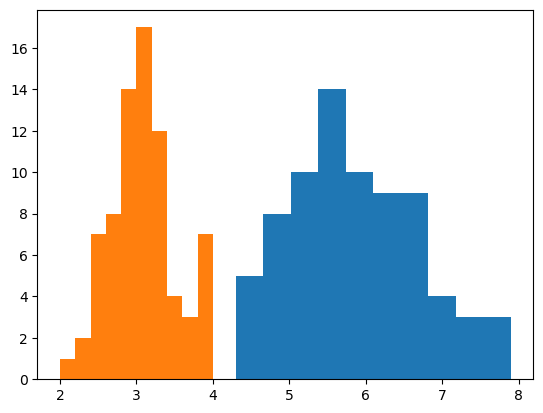

In [29]:
plt.hist(data=train, x='sepal_length')
plt.hist(data=train, x='sepal_width')

(array([20.,  5.,  0.,  3.,  5., 15.,  4., 11.,  5.,  7.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

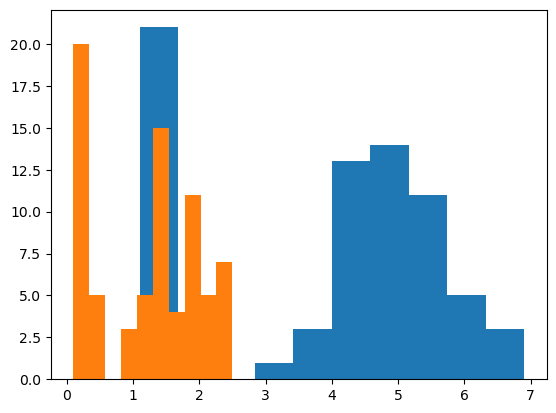

In [57]:
plt.hist(data=train, x='petal_length')
plt.hist(data=train, x='petal_width')

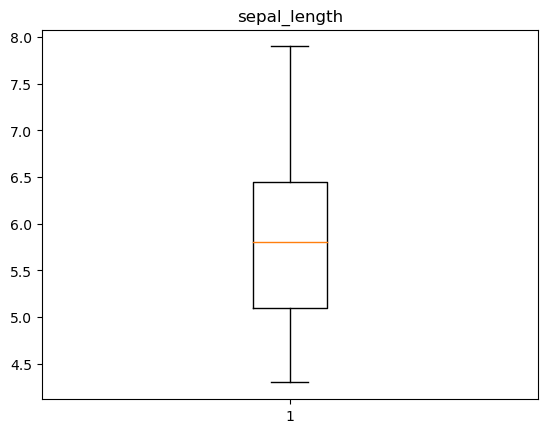

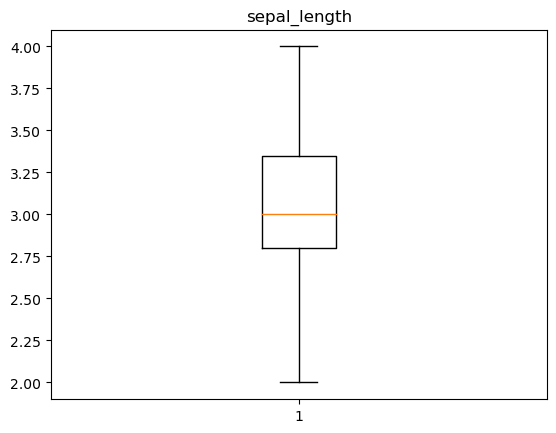

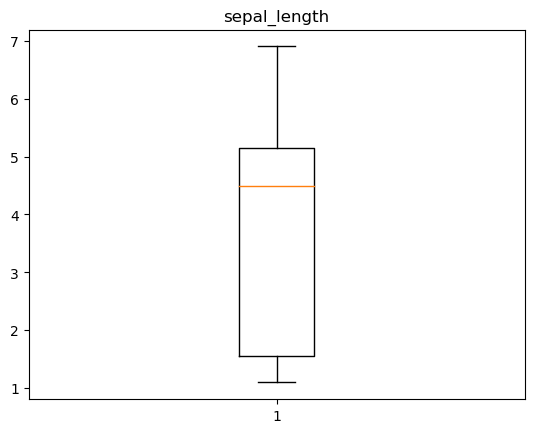

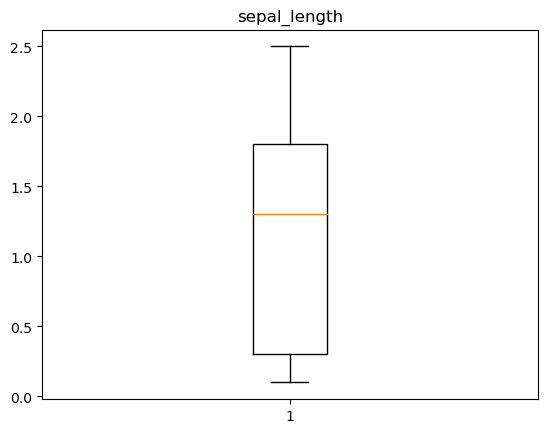

In [86]:
plt.boxplot(data=train, x='sepal_length')
plt.title(col)
plt.show()

plt.boxplot(data=train, x='sepal_width')
plt.title(col)
plt.show()

plt.boxplot(data=train, x='petal_length')
plt.title(col)            
plt.show()

plt.boxplot(data=train, x='petal_width')
plt.title(col)
plt.show()

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.



In [35]:
train.head()

,name,sepal_length,sepal_width,petal_length,petal_width,name_versicolor,name_virginica
41,setosa,4.5,2.3,1.3,0.3,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
144,virginica,6.7,3.3,5.7,2.5,0,1
131,virginica,7.9,3.8,6.4,2.0,0,1
61,versicolor,5.9,3.0,4.2,1.5,1,0


<AxesSubplot:xlabel='name', ylabel='count'>

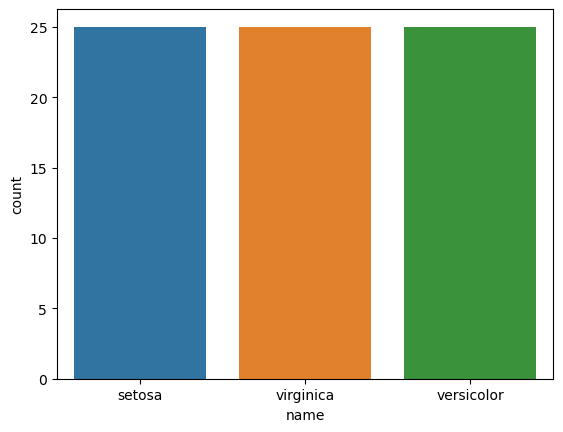

In [36]:
sns.countplot(x="name",data=train)


Document takeaways & any actions.



Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

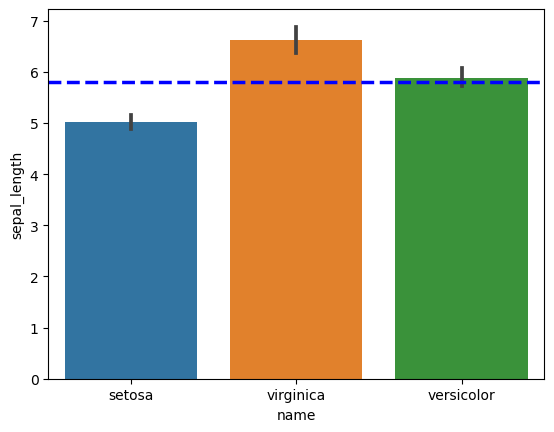

In [44]:
sns.barplot(x='name', y='sepal_length', data=train)
plt.axhline(train.sepal_length.median(),
            color='blue',
            ls='--', 
            lw=2.5)

For each measurement type, compute the descriptive statistics for each species.



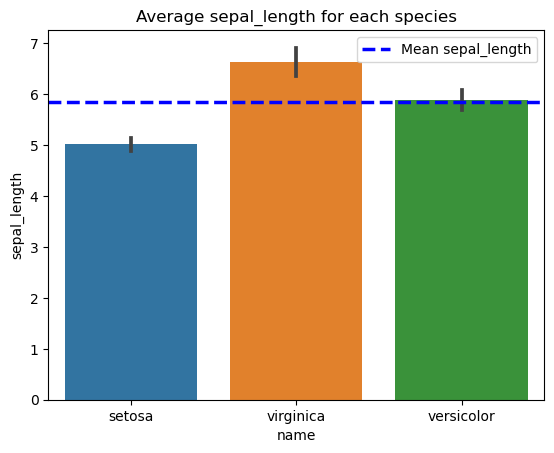

In [94]:
col = 'sepal_length'

sns.barplot(x='name', y=col, data=train)
plt.title(f'Average {col} for each species')
plt.axhline(train.sepal_length.mean(),
            label=f'Mean {col}',
            color='blue',
            ls='--', 
            lw=2.5)
plt.legend()
plt.show()

In [ ]:
train.groupby('name').describe

In [102]:
col = 'sepal_length'

# for col in num_cols:
    
#     sns.barplot(x='name', y=col, data=train)
#     plt.title(f'Average {col} for each species')
#     plt.axhline(train[col].mean(),
#                 label=f'Mean {col}',
#                 color='blue',
#                 ls='--')
#     plt.legend()
#     plt.show()
    
# train.groupby('name').describe().T

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.



$H_0$ : There is no significant difference in the mean petal width for Virginica vs Versicolor  
$H_a$ : There is a significant difference in the mean petal width for Virginical vs Versicolor

In [41]:
virginica = train[train['name'] == 'virginica']
versicolor = train[train['name'] == 'versicolor']
setosa = train[train['name'] == 'setosa']

In [103]:
alpha = .05
t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, alternative='two-sided')

t, p

(610.0, 7.376729097701161e-09)

In [ ]:
vir_pwidth = 2.042857
ver_pwidth = 1.334286
vir_plength = 5.622857
vir_swidth = 2.994286
vir_slength = 6.654286
ver_plength = 4.297143
ver_swidth = 2.782857
ver_slength = 5.925714

In [ ]:
stats.mannwhitneyu(vir_pwidth, ver_pwidth)

In [ ]:
stats.mannwhitneyu(vir_plength, ver_plength)

In [ ]:
stats.mannwhitneyu(vir_swidth, ver_swidth)

In [ ]:
stats.mannwhitneyu(vir_slength, ver_slength)

Document takeaways & any actions.



Multivariate Stats

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.



In [ ]:
sns.pairplot(data=train, hue='name')

Visualize two numeric variables of the species. Hint: sns.relplot with hue or col



In [ ]:
sns.relplot(data=train, x='petal_length',y='petal_width', hue='name')

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.



In [47]:
melted_train = train.melt(id_vars='name', value_vars=['petal_width', 'petal_length', 
                                                      'sepal_length', 'sepal_width'])
melted_train

,name,variable,value
0,setosa,petal_width,0.3
1,setosa,petal_width,0.2
2,virginica,petal_width,2.5
3,virginica,petal_width,2.0
4,versicolor,petal_width,1.5
...,...,...,...
295,setosa,sepal_width,3.2
296,setosa,sepal_width,3.6
297,versicolor,sepal_width,2.5
298,virginica,sepal_width,2.5


<AxesSubplot:xlabel='variable', ylabel='value'>

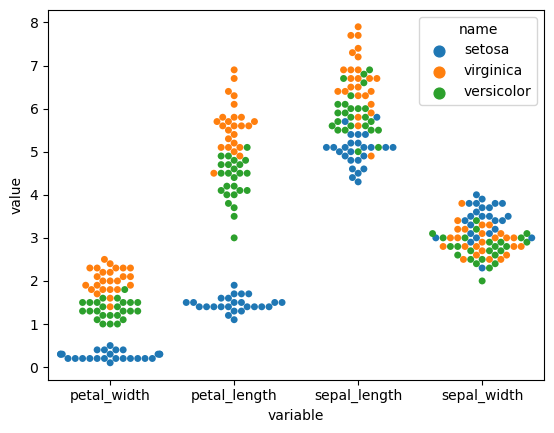

In [48]:
sns.swarmplot(data=melted_train, x='variable', y='value', hue='name')

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).



Document takeaways and any actions.



Part II

Explore your titanic dataset more completely.

Determine drivers of the target variable 
- Target variable here being whether or not the passenger survived

In [ ]:
titanic = acquire.get_titanic_data()

In [ ]:
titanic = prepare.prep_titanic(titanic)

In [ ]:
titanic.head()

Determine if certain columns should be dropped


Determine if it would be valuable to bin some numeric columns


In [ ]:
titanic['fare_bins'] = pd.qcut(titanic['fare'], q=10)

In [ ]:
titanic['age_bins'] = pd.qcut(titanic['age'], q=8)

In [ ]:
titanic.head()

Determine if it would be valuable to combine multiple columns into one.


Does it make sense to combine any features?



No, considering where I have this dataframe, combining any of these features together doesn't seem useful.

Do you find any surprises?



My main surprise here is that there is a huge disparity from the most expensive tickets to the next most expensive. I knew there was a difference, but only very few of them were in the hundreds.

Document any and all findings and takeaways in your notebook using markdown.



Part III

Explore your telco data to discover drivers of churn

In [15]:
telco = acquire.get_telco_data()

telco.head()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [16]:
telco = prepare.prep_telco(telco)

In [17]:
telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,contract_type,dependents,device_protection,gender,internet_service_type,multiple_lines,online_backup,online_security,paperless_billing,partner,payment_type,phone_service,streaming_movies,streaming_tv,tech_support
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Determine if certain columns should be dropped


In [18]:
telco.drop(telco.columns[3], axis=1)

,gender,senior_citizen,partner,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,contract_type,device_protection,gender,internet_service_type,multiple_lines,online_backup,online_security,paperless_billing,partner,payment_type,phone_service,streaming_movies,streaming_tv,tech_support
0,Female,0,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Male,0,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Male,0,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Male,1,Yes,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Female,1,Yes,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,No,13,Yes,No,Yes,No,No,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7039,Male,0,Yes,22,Yes,Yes,No,No,No,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7040,Male,0,No,2,Yes,No,No,Yes,No,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7041,Male,0,Yes,67,Yes,No,Yes,No,Yes,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Determine if it would be valuable to bin some numeric columns


In [19]:
telco['tenure_bins'] = pd.qcut(telco['tenure'], q=10)

In [20]:
telco['monthly_bins'] = pd.qcut(telco['monthly_charges'], q=10)

In [22]:
telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,contract_type,dependents,device_protection,gender,internet_service_type,multiple_lines,online_backup,online_security,paperless_billing,partner,payment_type,phone_service,streaming_movies,streaming_tv,tech_support,tenure_bins,monthly_bins
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(6.0, 12.0]","(58.83, 70.35]"
1,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"(6.0, 12.0]","(58.83, 70.35]"
2,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(2.0, 6.0]","(70.35, 79.1]"
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"(12.0, 20.0]","(94.25, 102.6]"
4,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(2.0, 6.0]","(79.1, 85.5]"


Determine if it would be valuable to combine multiple columns into one.


What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

